![](https://www.enisa.europa.eu/++theme++enisa.Theme/templates/img/logo-big.png)
___
# STATE OF VULNERABILITIES 2018 REPORT

![](vuln_race.gif)

This collection of notebooks accompanies the ENISA 2018 vulnerabilities study, available [here](REF). A collection of findings are highlighted in the report.

## Table of contents

1. [Average CVSS scores](1_average_CVSS_scores.ipynb)
2. [High CVSS Distribution](2_high_CVSS_distribution.ipynb)
3. [CWE with high CVSS](3_CWE_with_high_CVSS.ipynb)
4. [Top 10 weaknesses per product](4_top_10_weaknesses_per_product.ipynb)
5. [Top Vulnerabilities per sector](5_top_vulnerabilities_per_sector.ipynb)
6. [Vulnerabilities in web vs native](6_vulnerabilities_in_web_vs_native.ipynb)
7. [Vulnerabilities in Open Source](7_vulnerabilities_in_open_source.ipynb)
8. [Events attributed to vulnerabilities](8_events_attributed_to_vulnerabilities.ipynb)
9. [High score vulnerabilities and known exploits](9_high_score_and_known_exploits.ipynb)
10. [Vulnerability lifecycle](10_vulnerability_lifecycle.ipynb)
11. [ATT&CK and CAPEC patterns](11_ATT&CK_capec.ipynb)
12. [Application Types](12_application_types.ipynb)
13. [Prices](13_prices.ipynb)


____


In [3]:
#run the following if wordcloud is not installed
!pip install wordcloud

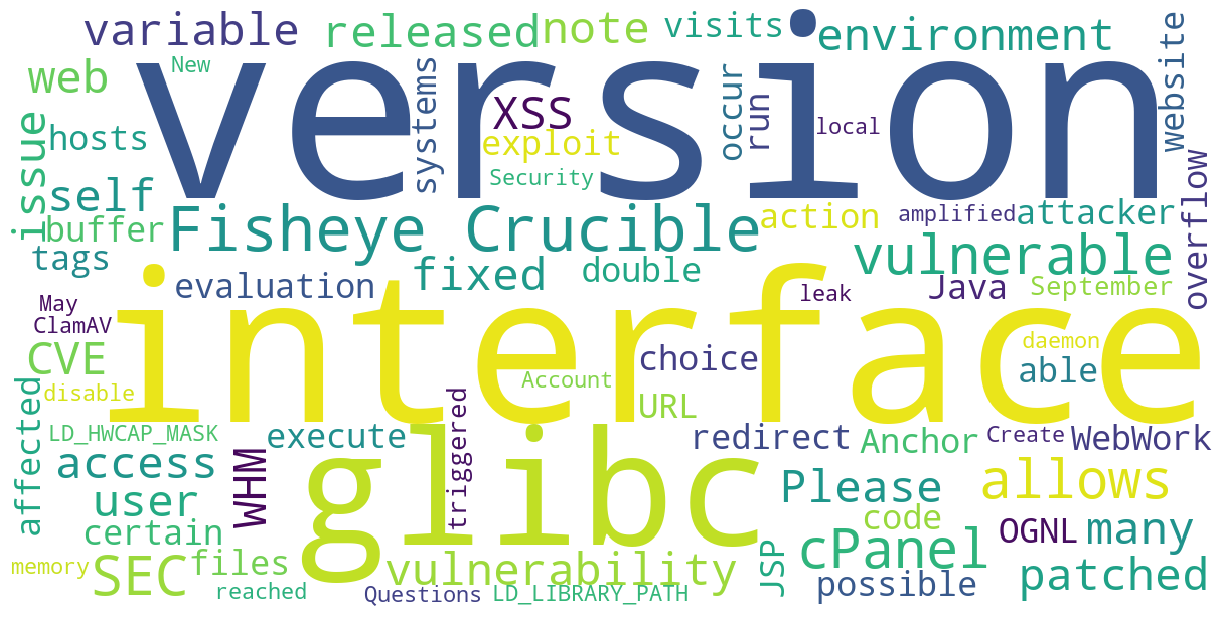

In [2]:
# Wordcloud on the relative appearance of terms in vulnerabilities description text

from wordcloud import WordCloud      # visualising word clouds
import pandas as pd                  # standard pandas import
import matplotlib.pyplot as plt      # generate plot

data = pd.read_csv('../data/all.csv', low_memory=False)

wordcloud = WordCloud(width=1200, height=600, background_color="white").generate(str(data.description.values))

plt.figure(figsize=(20,10), dpi=80)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [18]:
!pip install texttable

  Created wheel for texttable: filename=texttable-1.6.2-cp37-none-any.whl size=10654 sha256=3027eac7b5f16b90bb349810df579fdc40ac4a15686204ae48c54ab3d1139cb2
  Stored in directory: /Users/vasiliskatos/Library/Caches/pip/wheels/51/d1/d6/dfbe4eb3c468832f7fbe4bd27f9875fa97277cabed8fb6715c
Successfully built texttable


In [3]:
from texttable import Texttable

print('Dataset Overview:\n')

data['published_date'] = pd.to_datetime(data['date_published']).dt.date
print(f"Earliest date: {data.published_date.min()}")
print(f"Latest date: {data.published_date.max()}")
print(f"Over {(data.published_date.max() - data.published_date.min()).days} days")

data.drop(columns='published_date')

t = Texttable()

total=data.id.describe()[0]

table=[['Name','size (%)']]
for c in data.columns:
    table.append([c, str(data[c].describe()[0])+' ('+str(round(data[c].describe()[0]/total*100,2))+')'])
t.add_rows(table)
print(t.draw())

Dataset Overview:

Earliest date: 2018-01-01
Latest date: 2019-08-30
Over 606 days
+------------------------+-----------------+
|          Name          |    size (%)     |
+========================+=================+
| Unnamed: 0             | 27471.0 (100.0) |
+------------------------+-----------------+
| id                     | 27471.0 (100.0) |
+------------------------+-----------------+
| source_db              | 27471 (100.0)   |
+------------------------+-----------------+
| source_db_id           | 27471 (100.0)   |
+------------------------+-----------------+
| cna                    | 27471 (100.0)   |
+------------------------+-----------------+
| cvss3_bscore           | 27471.0 (100.0) |
+------------------------+-----------------+
| cvss3_severity         | 27471 (100.0)   |
+------------------------+-----------------+
| cvss3_impact           | 27471.0 (100.0) |
+------------------------+-----------------+
| cvss3_exploitability   | 27471.0 (100.0) |
+----------------